<a href="https://colab.research.google.com/github/fatjan/learn-tensorflow/blob/master/ClassifyRealWorldImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Convolutions with Complex Images

Download the dataset

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-12-12 05:05:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.12.240, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   172MB/s    in 0.8s    

2020-12-12 05:05:05 (172 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-12-12 05:05:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.12.240, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 

Unzip the files and put the image data into directories

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
# Directory with our training horse pictures 
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures 
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures 
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures 
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse22-1.png', 'horse13-0.png', 'horse22-4.png', 'horse19-2.png', 'horse23-5.png', 'horse18-5.png', 'horse10-1.png', 'horse27-8.png', 'horse28-7.png', 'horse35-2.png']
['human04-12.png', 'human09-19.png', 'human10-16.png', 'human13-04.png', 'human15-21.png', 'human09-29.png', 'human13-11.png', 'human17-12.png', 'human03-12.png', 'human16-15.png']


In [6]:
print('total training horse images: ', len(os.listdir(train_horse_dir)))
print('total training human images: ', len(os.listdir(train_human_dir)))


total training horse images:  500
total training human images:  527


Now let's look at some of the images

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for our graph; we'll output images in 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0



Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:


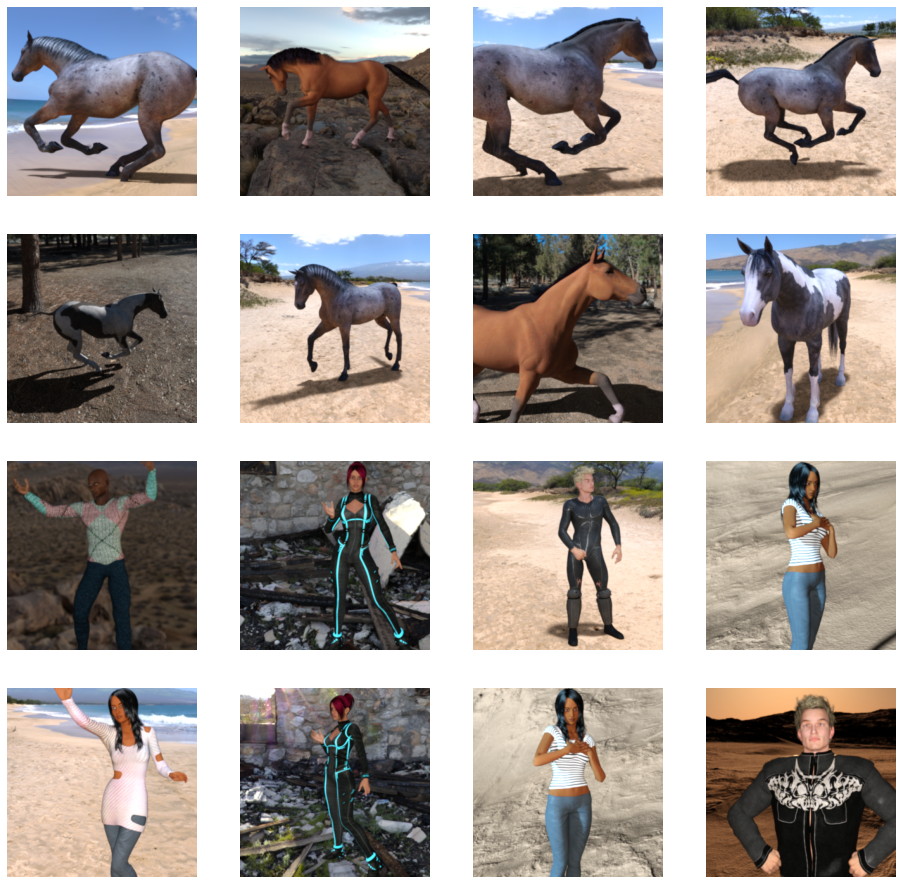

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Build a model from scratch

Import TensorFlow

In [10]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.3.0


In [12]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr = 0.001),
              metrics=['accuracy'])

# Data Preprocessing

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/', # This is the source directory for training images
    target_size = (300, 300), # All images will be resized to 150x150
    batch_size = 128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Train the model

In [19]:
history = model.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    steps_per_epoch = 8,
    validation_steps = 8,
    verbose = 2
)

Epoch 1/15
8/8 - 6s - loss: 1.1170 - accuracy: 0.6185 - val_loss: 0.6209 - val_accuracy: 0.5664
Epoch 2/15
8/8 - 7s - loss: 0.5767 - accuracy: 0.7030 - val_loss: 1.3107 - val_accuracy: 0.6367
Epoch 3/15
8/8 - 6s - loss: 0.3545 - accuracy: 0.8376 - val_loss: 1.9180 - val_accuracy: 0.6641
Epoch 4/15
8/8 - 7s - loss: 0.1819 - accuracy: 0.9310 - val_loss: 2.5724 - val_accuracy: 0.6914
Epoch 5/15
8/8 - 6s - loss: 0.0571 - accuracy: 0.9844 - val_loss: 4.0915 - val_accuracy: 0.6602
Epoch 6/15
8/8 - 6s - loss: 0.3189 - accuracy: 0.9066 - val_loss: 2.9005 - val_accuracy: 0.6719
Epoch 7/15
8/8 - 6s - loss: 0.0713 - accuracy: 0.9733 - val_loss: 3.4900 - val_accuracy: 0.6914
Epoch 8/15
8/8 - 7s - loss: 0.1080 - accuracy: 0.9555 - val_loss: 3.7813 - val_accuracy: 0.7031
Epoch 9/15
8/8 - 7s - loss: 0.0336 - accuracy: 0.9911 - val_loss: 3.7498 - val_accuracy: 0.7070
Epoch 10/15
8/8 - 7s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 4.7415 - val_accuracy: 0.7109
Epoch 11/15
8/8 - 7s - loss: 0.0031 - a

Test our model by uploading images

It can be seen that the val-accuray is only 0.77 while the training accuracy reached 1. This is an indication of overfitting

In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')


Saving horse-juga.jpeg to horse-juga.jpeg
[0.]
horse-juga.jpeg is a horse


# Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

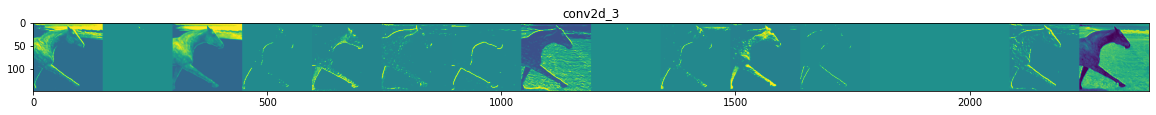

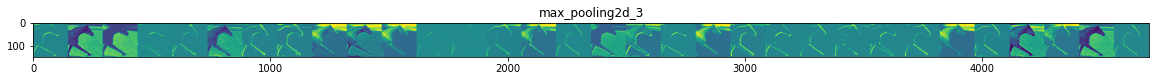

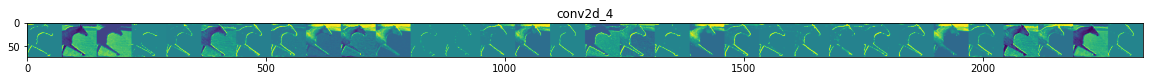

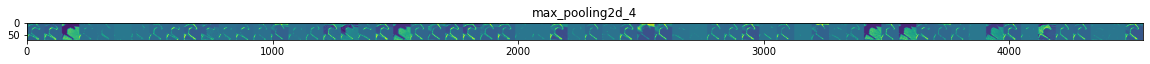

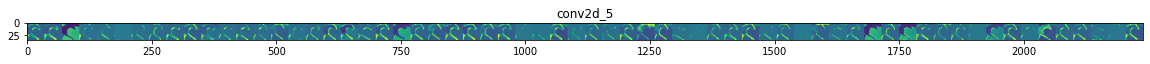

In [31]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.all() > 0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)